In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from scipy import stats
from scipy.stats import norm

In [ ]:
train_df = pd.read_csv('train_v9rqX0R.csv')
test_df = pd.read_csv('test_AbJTz2l.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
pd.read_csv('train_v9rqX0R.csv')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df = pd.concat([train_df,test_df],ignore_index=True)

In [ ]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
df[df['Outlet_Location_Type'] == 'Tier 2']['Outlet_Type'].unique()

array(['Supermarket Type1'], dtype=object)

In [ ]:
df[df['Outlet_Location_Type'] == 'Tier 1']['Outlet_Size'].unique()

array(['Medium', 'Small'], dtype=object)

In [ ]:
df[df['Outlet_Location_Type'] == 'Tier 2']['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [ ]:
df[df['Outlet_Location_Type'] == 'Tier 3']['Outlet_Size'].unique()

array(['Medium', nan, 'High'], dtype=object)

In [ ]:
df[df['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].unique()

array(['Medium', 'High', nan, 'Small'], dtype=object)

In [ ]:
df[df['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [ ]:
df[df['Outlet_Identifier'] == 'OUT019']['Outlet_Size'].unique()

array(['Small'], dtype=object)

In [ ]:
df.groupby(['Outlet_Identifier'])['Outlet_Type'].agg(pd.Series.mode)

Outlet_Identifier
OUT010        Grocery Store
OUT013    Supermarket Type1
OUT017    Supermarket Type1
OUT018    Supermarket Type2
OUT019        Grocery Store
OUT027    Supermarket Type3
OUT035    Supermarket Type1
OUT045    Supermarket Type1
OUT046    Supermarket Type1
OUT049    Supermarket Type1
Name: Outlet_Type, dtype: object

In [ ]:
df[df['Outlet_Identifier'] == 'OUT049']['Outlet_Size'].unique()

array(['Medium'], dtype=object)

Columns to play an important role -> Item_Visibility, Item_Type, Item_MRP, Outlet_Type, Outlet_Establishment_Year

In [ ]:
df['Item_Outlet_Sales'].describe() 

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

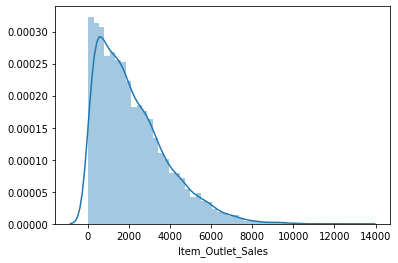

In [ ]:
sns.distplot(train_df['Item_Outlet_Sales'])

In [ ]:
print("Skewness: %f" % df['Item_Outlet_Sales'].skew())
print("Kurtosis: %f" % df['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtosis: 1.615877


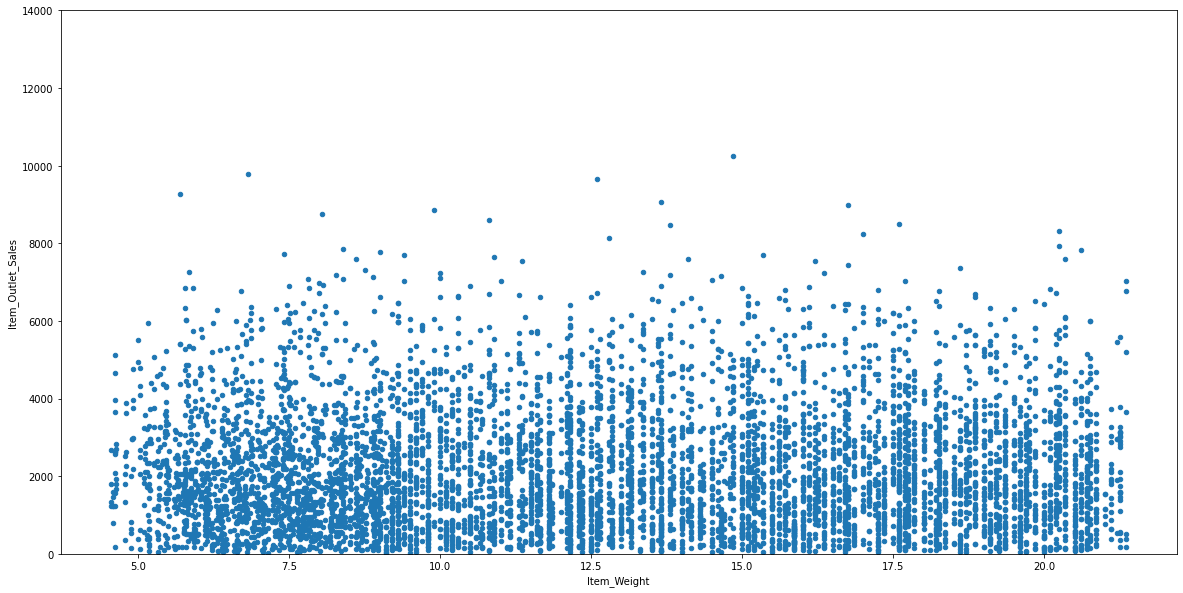

In [ ]:
df.plot.scatter(x='Item_Weight', y='Item_Outlet_Sales', ylim=(0, 14000), figsize = (20,10))

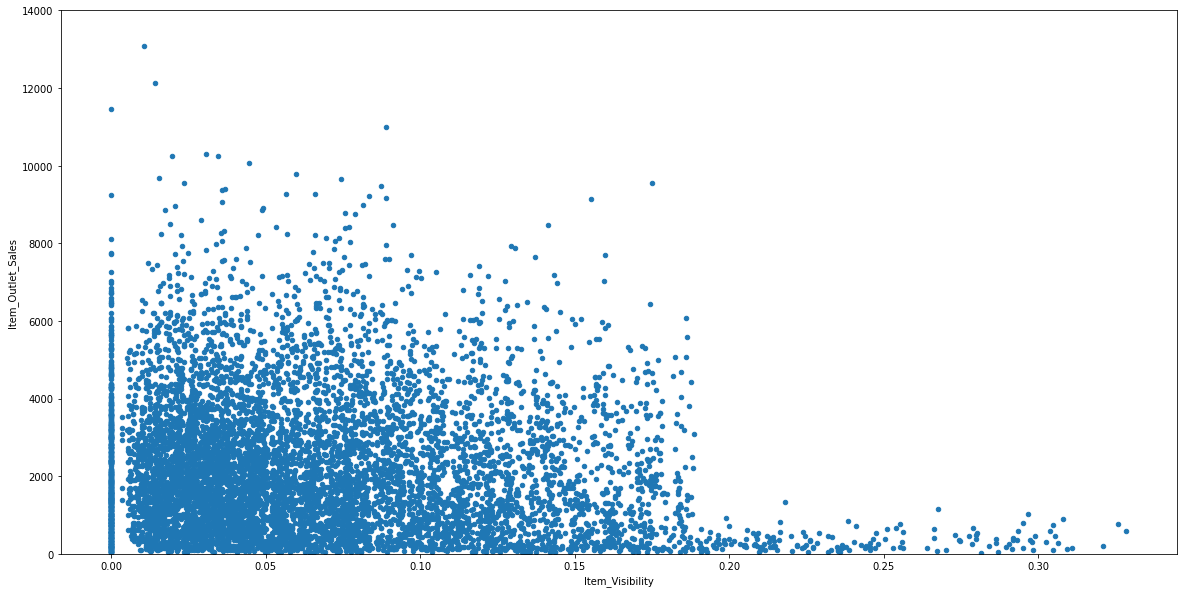

In [ ]:
df.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales', ylim=(0, 14000), figsize = (20,10))

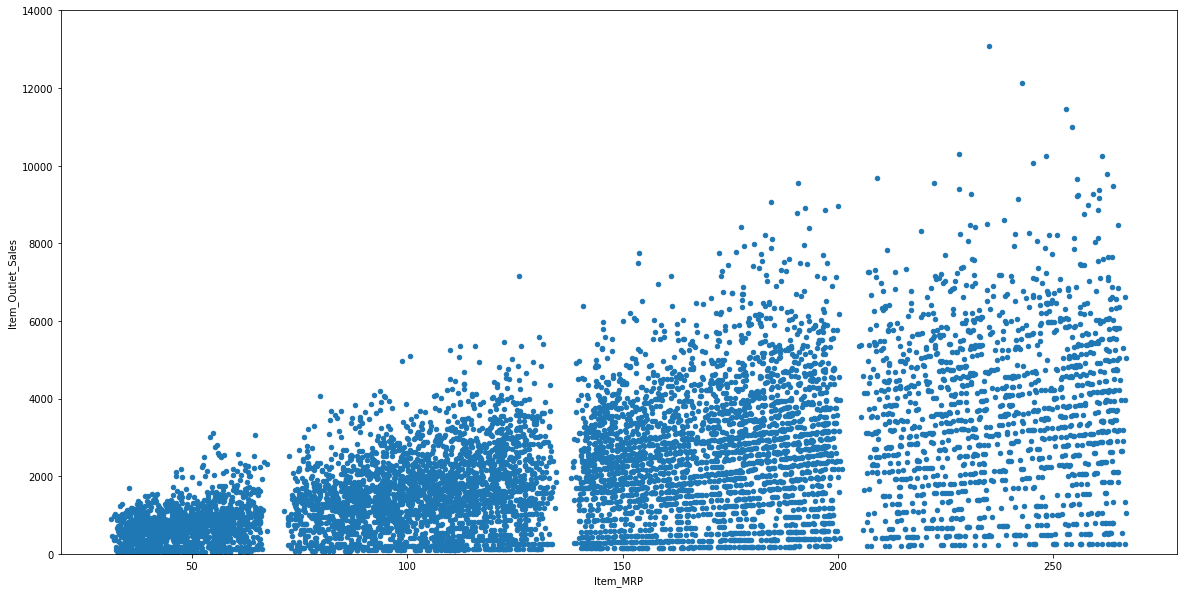

In [ ]:
train_df.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales', ylim=(0, 14000), figsize = (20,10))

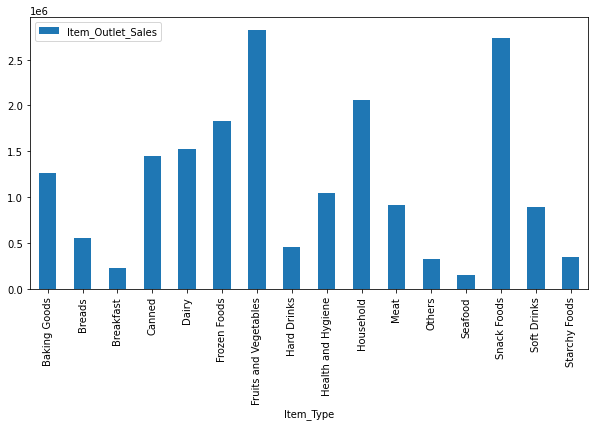

In [ ]:
df2 = pd.concat([train_df['Item_Type'], train_df['Item_Outlet_Sales']], axis=1)
df2.groupby('Item_Type').sum().plot(kind='bar', figsize = (10,5))

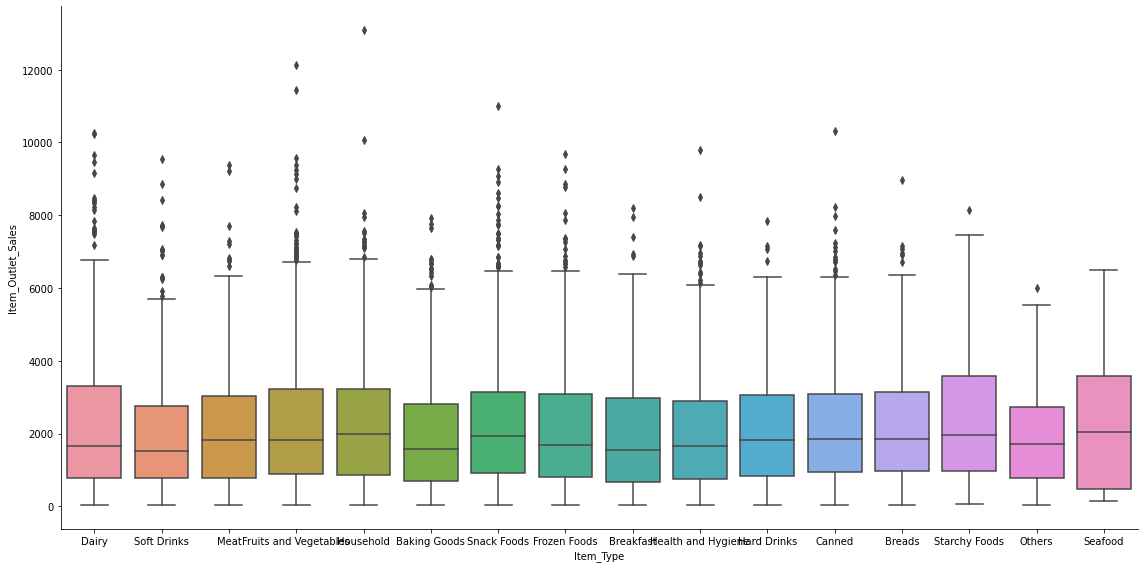

In [ ]:
sns.catplot(x = 'Item_Type', y = 'Item_Outlet_Sales', kind = 'box', data = train_df, height=8, aspect=2)

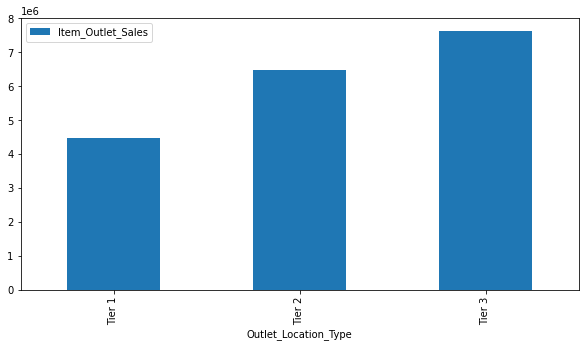

In [ ]:
df2 = pd.concat([train_df['Outlet_Location_Type'], train_df['Item_Outlet_Sales']], axis=1)
df2.groupby('Outlet_Location_Type').sum().plot(kind='bar', figsize = (10,5))

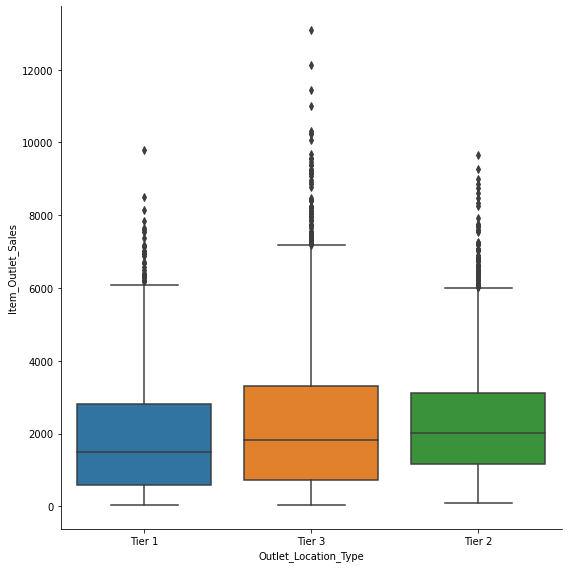

In [ ]:
sns.catplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', kind = 'box', data = train_df, height=8, aspect=1)

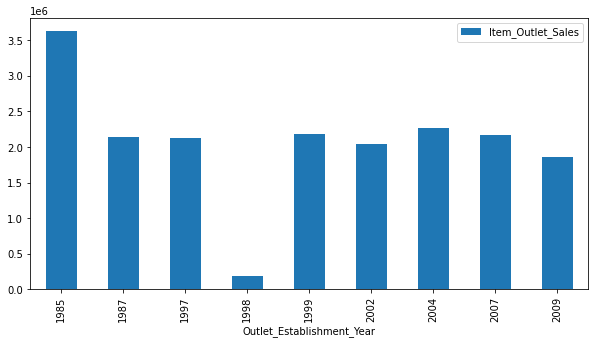

In [ ]:
df2 = pd.concat([train_df['Outlet_Establishment_Year'], train_df['Item_Outlet_Sales']], axis=1)
df2.groupby('Outlet_Establishment_Year').sum().plot(kind='bar', figsize = (10,5))

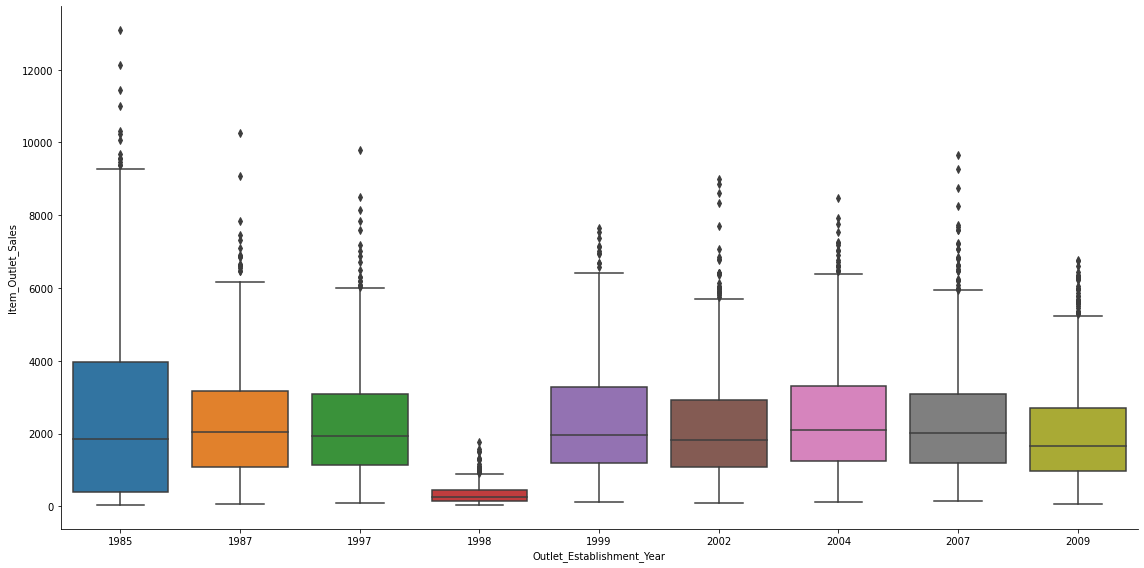

In [ ]:
sns.catplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', kind = 'box', data = df, height=8, aspect=2)

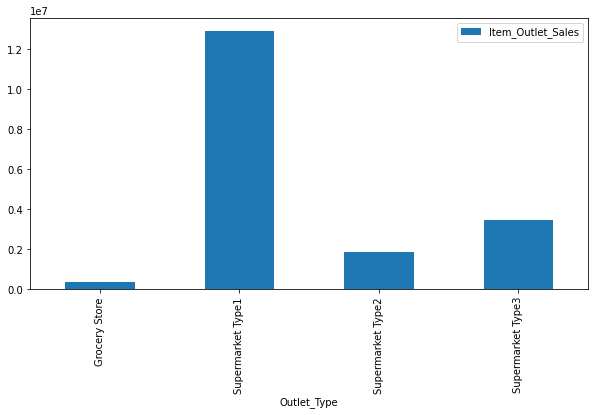

In [ ]:
df2 = pd.concat([train_df['Outlet_Type'], train_df['Item_Outlet_Sales']], axis=1)
df2.groupby('Outlet_Type').sum().plot(kind='bar', figsize = (10,5))

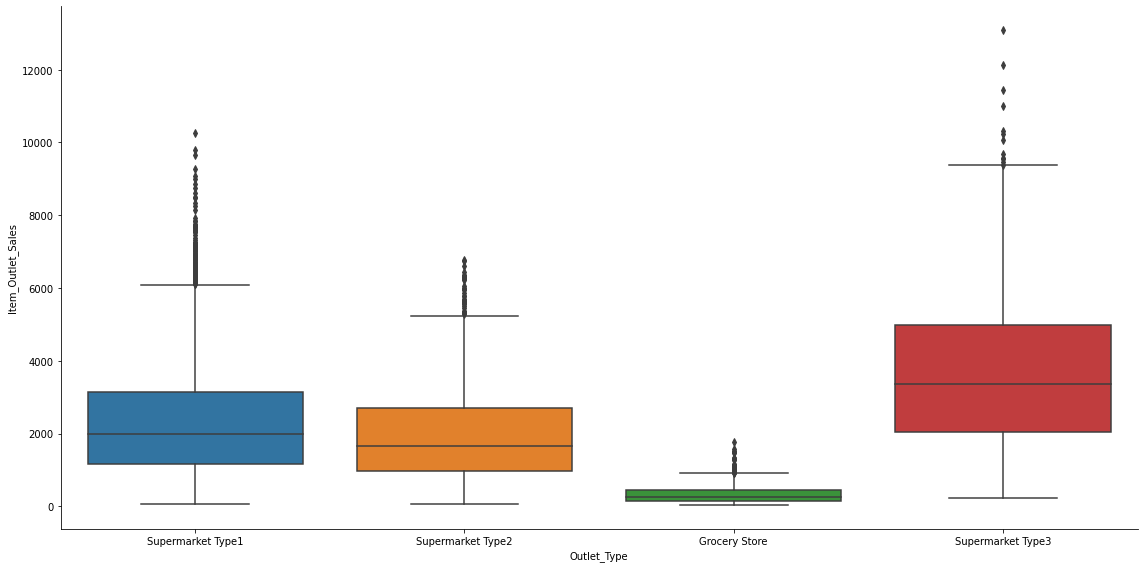

In [ ]:
sns.catplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', kind = 'box', data = df, height=8, aspect=2)

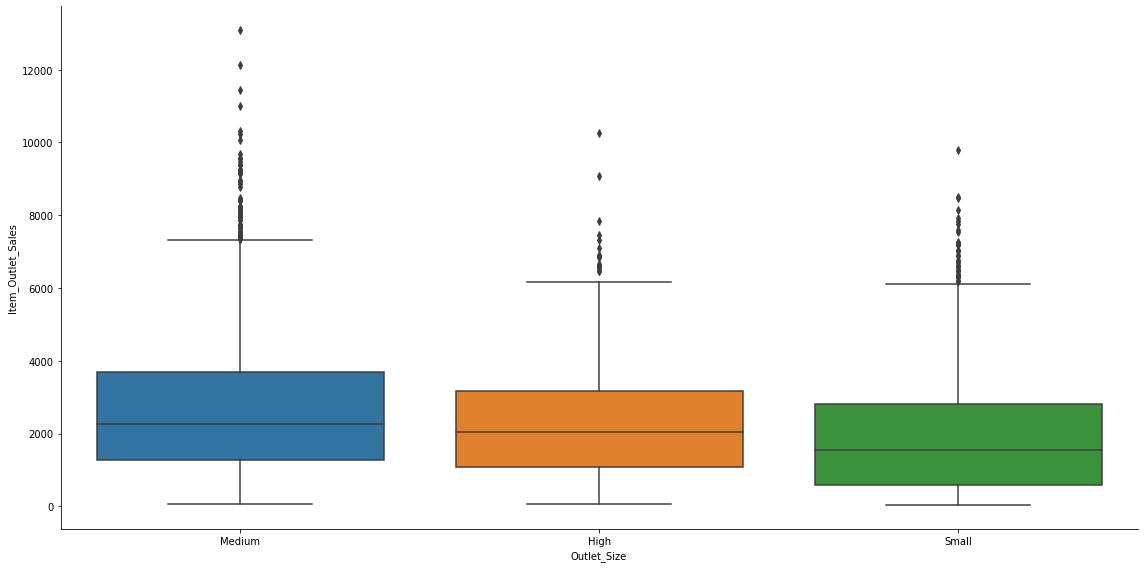

In [ ]:
df2 = df[['Outlet_Size', 'Item_Outlet_Sales']].dropna()
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', kind = 'box', data = df2, height=8, aspect=2)

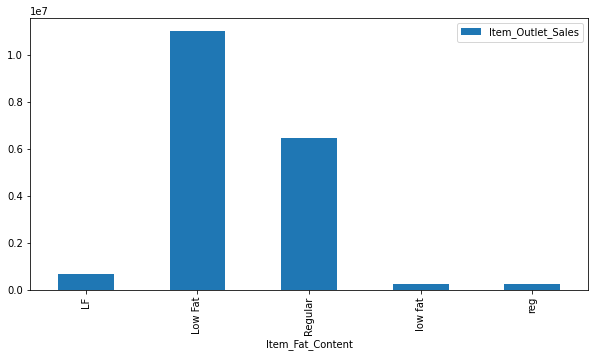

In [ ]:
df2 = pd.concat([train_df['Item_Fat_Content'], train_df['Item_Outlet_Sales']], axis=1)
df2.groupby('Item_Fat_Content').sum().plot(kind='bar', figsize = (10,5))

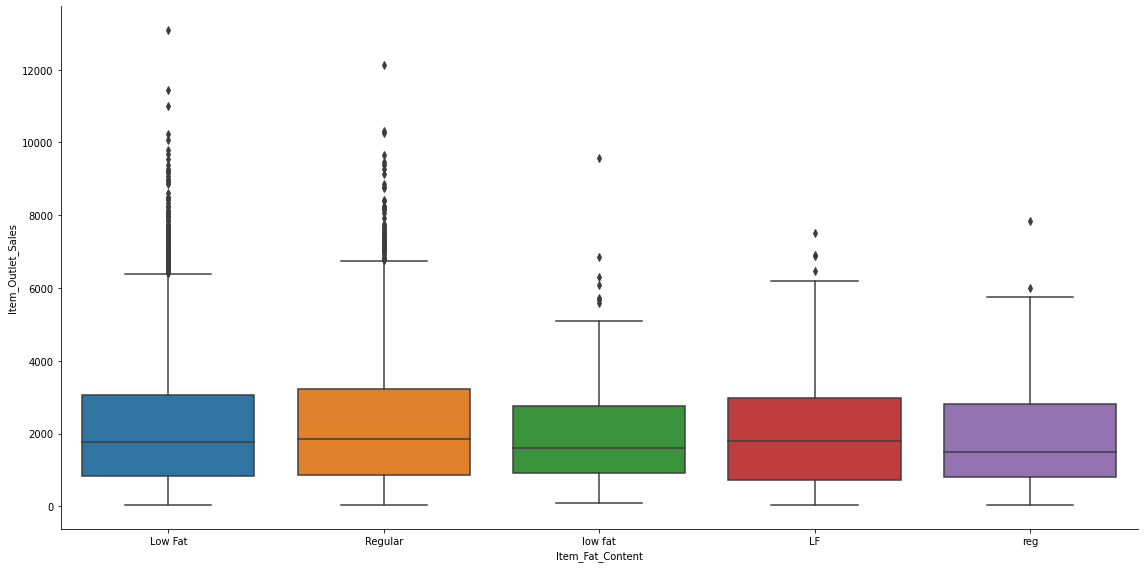

In [ ]:
sns.catplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', kind = 'box', data = df, height=8, aspect=2)

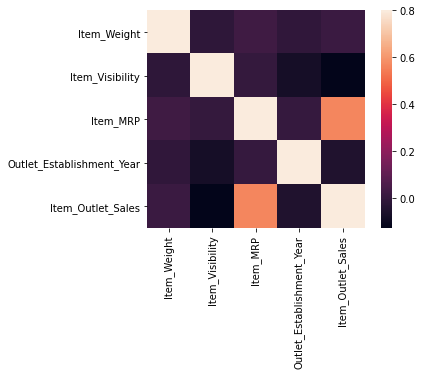

In [ ]:
sns.heatmap(df.corr(), vmax=.8, square=True, )

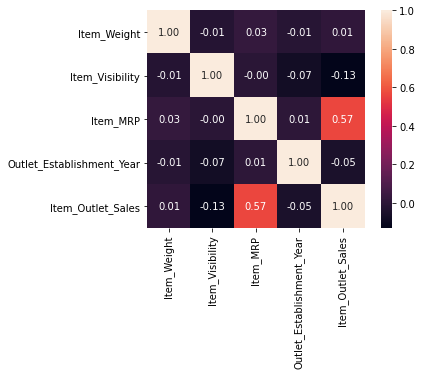

In [ ]:
sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


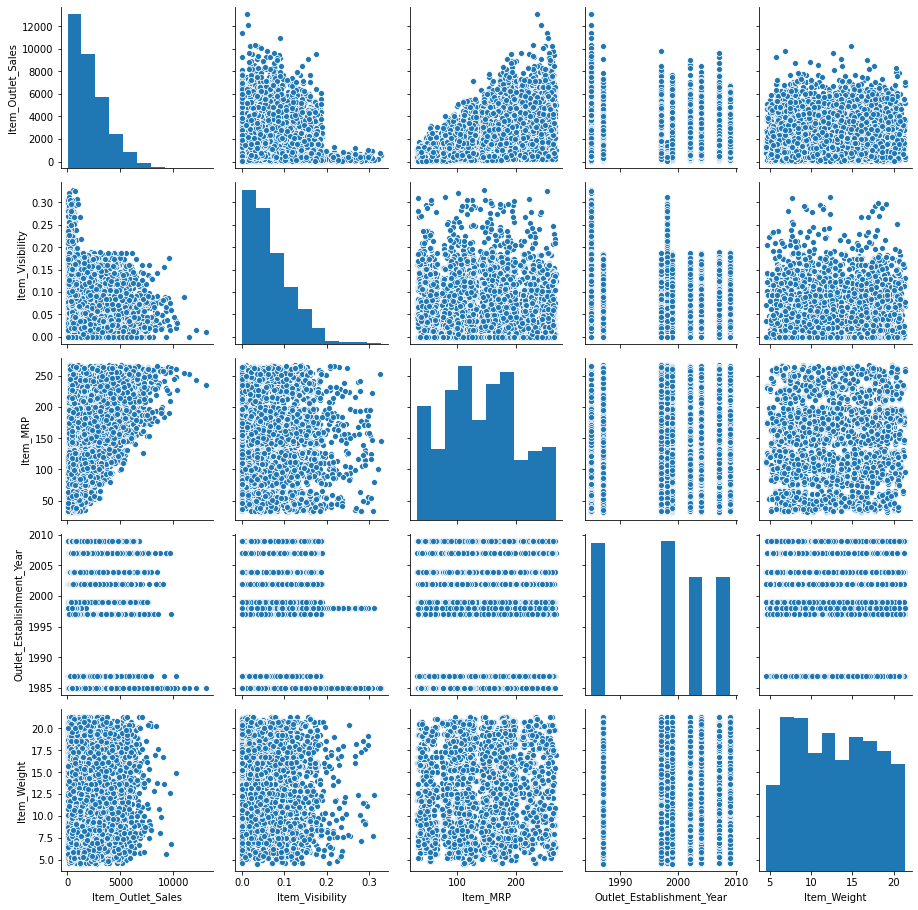

In [ ]:
cols = ['Item_Outlet_Sales', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Weight']
sns.pairplot(df[cols], size = 2.5)

Missing data

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

In [ ]:
df.isnull().mean().sort_values(ascending=False)

Outlet_Size                  0.282764
Item_Weight                  0.171653
Item_Outlet_Sales            0.000000
Outlet_Type                  0.000000
Outlet_Location_Type         0.000000
Outlet_Establishment_Year    0.000000
Outlet_Identifier            0.000000
Item_MRP                     0.000000
Item_Type                    0.000000
Item_Visibility              0.000000
Item_Fat_Content             0.000000
Item_Identifier              0.000000
dtype: float64

In [ ]:
df[df['Outlet_Type'] == 'Grocery Store'].isnull().sum()

Item_Identifier                0
Item_Weight                  528
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [ ]:
df[df['Outlet_Type'] == 'Grocery Store']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].agg(pd.Series.mode)

Outlet_Location_Type
Tier 1     Small
Tier 2     Small
Tier 3    Medium
Name: Outlet_Size, dtype: object

In [ ]:
df[df['Outlet_Size'].isna()].groupby(['Outlet_Identifier'])['Outlet_Location_Type'].unique()

Outlet_Identifier
OUT010    [Tier 3]
OUT017    [Tier 2]
OUT045    [Tier 2]
Name: Outlet_Location_Type, dtype: object

In [ ]:
df.groupby(['Outlet_Identifier'])['Outlet_Size'].unique()

Outlet_Identifier
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: Outlet_Size, dtype: object

In [ ]:
df.groupby(['Outlet_Identifier'])['Outlet_Type'].unique()

Outlet_Identifier
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: Outlet_Type, dtype: object

In [ ]:
df.groupby(['Outlet_Type'])['Outlet_Size'].unique()

Outlet_Type
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: Outlet_Size, dtype: object

In [ ]:
train_df.loc[train_df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'] = train_df.loc[train_df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'].fillna('Medium')
train_df.loc[train_df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'] = train_df.loc[train_df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'].fillna('Small')
train_df.loc[train_df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'] = train_df.loc[train_df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'].fillna('Small')

In [ ]:
test_df.loc[test_df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'] = test_df.loc[test_df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'].fillna('Medium')
test_df.loc[test_df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'] = test_df.loc[test_df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'].fillna('Small')
test_df.loc[test_df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'] = test_df.loc[test_df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'].fillna('Small')

In [ ]:
Item_Sales_Scaled = StandardScaler().fit_transform(train_df['Item_Outlet_Sales'][:, np.newaxis])
low_range = Item_Sales_Scaled[Item_Sales_Scaled[:,0].argsort()][:10]
high_range = Item_Sales_Scaled[Item_Sales_Scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.25879017]
 [-1.25879017]
 [-1.25839999]
 [-1.25800981]
 [-1.25761963]
 [-1.25683928]
 [-1.25683928]
 [-1.2564491 ]
 [-1.25605892]
 [-1.25605892]]

outer range (high) of the distribution:
[[4.39333221]
 [4.45302948]
 [4.62470792]
 [4.72069177]
 [4.73239712]
 [4.76166049]
 [5.16432446]
 [5.42886533]
 [5.82294538]
 [6.39104493]]


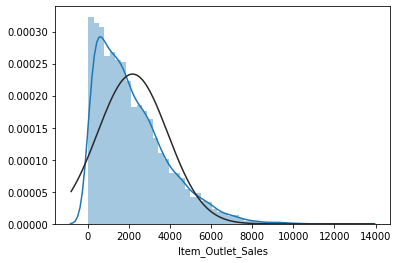

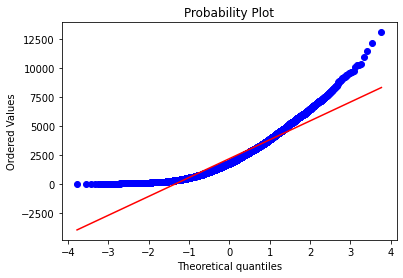

In [ ]:
sns.distplot(train_df['Item_Outlet_Sales'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Item_Outlet_Sales'], plot=plt)

In [ ]:
train_df['Item_Outlet_Sales'] = np.sqrt(train_df['Item_Outlet_Sales'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


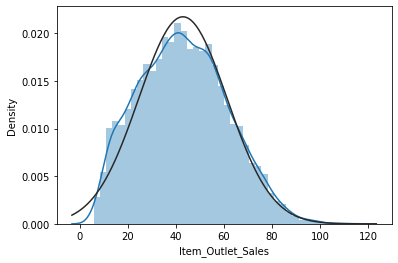

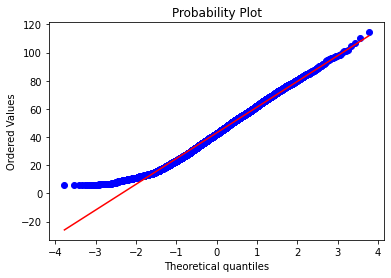

In [ ]:
sns.distplot(train_df['Item_Outlet_Sales'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Item_Outlet_Sales'], plot=plt)

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225540
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.094524
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648392
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.596300
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.902446


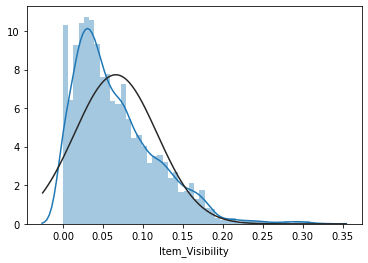

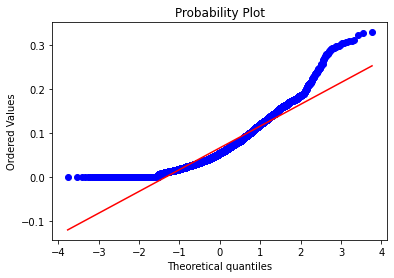

In [ ]:
sns.distplot(train_df['Item_Visibility'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Item_Visibility'], plot=plt)

In [ ]:
train_df['Has_Visibility'] = pd.Series(len(train_df['Item_Visibility']), index=train_df.index)
train_df['Has_Visibility'] = 0
train_df.loc[train_df['Item_Visibility']>0, 'Has_Visibility'] = 1

In [ ]:
train_df.loc[train_df['Item_Visibility'] != 0, 'Item_Visibility'] = np.log(train_df.loc[train_df['Item_Visibility'] != 0, 'Item_Visibility'] )

In [ ]:
test_df['Has_Visibility'] = pd.Series(len(test_df['Item_Visibility']), index=test_df.index)
test_df['Has_Visibility'] = 0
test_df.loc[test_df['Item_Visibility']>0, 'Has_Visibility'] = 1

In [ ]:
test_df.loc[test_df['Item_Visibility'] != 0, 'Item_Visibility'] = np.log(test_df.loc[test_df['Item_Visibility'] != 0, 'Item_Visibility'] )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


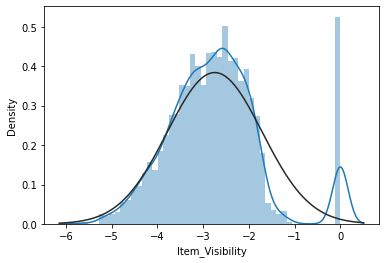

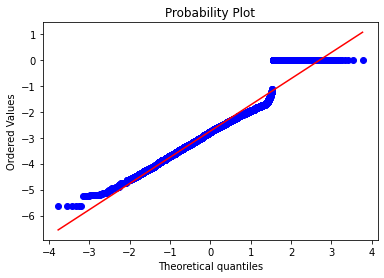

In [ ]:
sns.distplot(train_df['Item_Visibility'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Item_Visibility'], plot=plt)

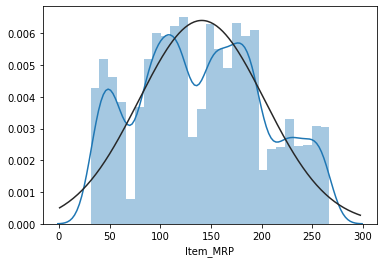

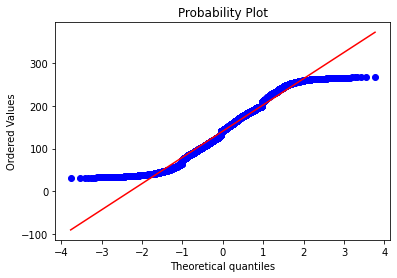

In [ ]:
sns.distplot(train_df['Item_MRP'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Item_MRP'], plot=plt)

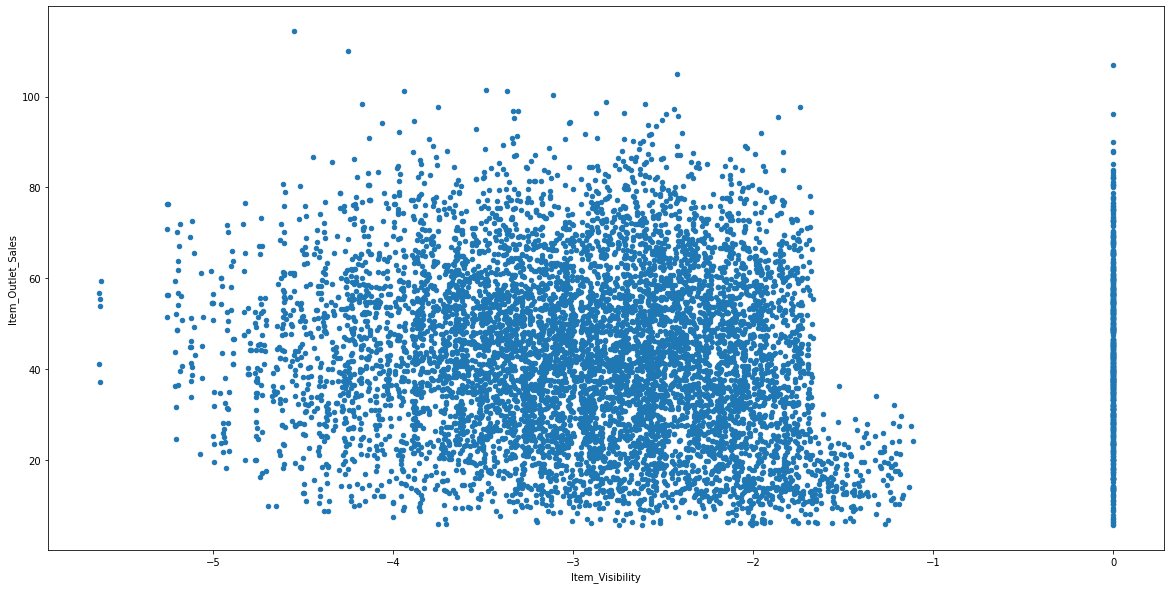

In [ ]:
train_df.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales', figsize = (20,10))

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility
0,FDA15,9.30,Low Fat,-4.132215,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775,1
1,DRC01,5.92,Regular,-3.948780,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607,1
2,FDN15,17.50,Low Fat,-4.088756,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,45.795961,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,27.062520,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,31.538947,0


In [ ]:
df.groupby(['Outlet_Identifier'])['Outlet_Location_Type'].unique()

Outlet_Identifier
OUT010    [Tier 3]
OUT013    [Tier 3]
OUT017    [Tier 2]
OUT018    [Tier 3]
OUT019    [Tier 1]
OUT027    [Tier 3]
OUT035    [Tier 2]
OUT045    [Tier 2]
OUT046    [Tier 1]
OUT049    [Tier 1]
Name: Outlet_Location_Type, dtype: object

In [ ]:
df.groupby(['Outlet_Identifier'])['Outlet_Type'].unique()

Outlet_Identifier
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: Outlet_Type, dtype: object

In [ ]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Has_Visibility                  0
dtype: int64

In [ ]:
train_df['Outlet_Size'] = train_df['Outlet_Size'].replace({'Small': 1, 'Medium': 2, 'High': 3})
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility
0,FDA15,9.30,Low Fat,-4.132215,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,61.115775,1
1,DRC01,5.92,Regular,-3.948780,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,21.057607,1
2,FDN15,17.50,Low Fat,-4.088756,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,45.795961,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,27.062520,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,31.538947,0


In [ ]:
test_df['Outlet_Size'] = test_df['Outlet_Size'].replace({'Small': 1, 'Medium': 2, 'High': 3})

In [ ]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF': 1, 'Low Fat': 1, 'low fat': 1, 'Regular': 2, 'reg': 2})
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility
0,FDA15,9.30,1,-4.132215,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,61.115775,1
1,DRC01,5.92,2,-3.948780,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,21.057607,1
2,FDN15,17.50,1,-4.088756,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,45.795961,1
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,27.062520,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,31.538947,0


In [ ]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'LF': 1, 'Low Fat': 1, 'low fat': 1, 'Regular': 2, 'reg': 2})

In [ ]:
df['Item_Type'].value_counts()/len(df)

Fruits and Vegetables    0.141721
Snack Foods              0.140031
Household                0.108983
Frozen Foods             0.100394
Dairy                    0.079977
Baking Goods             0.076457
Canned                   0.076317
Health and Hygiene       0.060406
Meat                     0.051816
Soft Drinks              0.051112
Breads                   0.029288
Hard Drinks              0.025486
Others                   0.019713
Starchy Foods            0.018938
Breakfast                0.013095
Seafood                  0.006266
Name: Item_Type, dtype: float64

In [ ]:
train_df['Outlet_Location_Type'] = train_df['Outlet_Location_Type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility
0,FDA15,9.30,1,-4.132215,Dairy,249.8092,OUT049,1999,2,1,Supermarket Type1,61.115775,1
1,DRC01,5.92,2,-3.948780,Soft Drinks,48.2692,OUT018,2009,2,3,Supermarket Type2,21.057607,1
2,FDN15,17.50,1,-4.088756,Meat,141.6180,OUT049,1999,2,1,Supermarket Type1,45.795961,1
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,3,Grocery Store,27.062520,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3,3,Supermarket Type1,31.538947,0


In [ ]:
test_df['Outlet_Location_Type'] = test_df['Outlet_Location_Type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})

In [ ]:
train_df['Outlet_Type'] = train_df['Outlet_Type'].replace({'Grocery Store': 1, 'Supermarket Type1': 2, 'Supermarket Type2': 3, 'Supermarket Type3': 4})
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility
0,FDA15,9.30,1,-4.132215,Dairy,249.8092,OUT049,1999,2,1,2,61.115775,1
1,DRC01,5.92,2,-3.948780,Soft Drinks,48.2692,OUT018,2009,2,3,3,21.057607,1
2,FDN15,17.50,1,-4.088756,Meat,141.6180,OUT049,1999,2,1,2,45.795961,1
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,3,1,27.062520,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3,3,2,31.538947,0


In [ ]:
test_df['Outlet_Type'] = test_df['Outlet_Type'].replace({'Grocery Store': 1, 'Supermarket Type1': 2, 'Supermarket Type2': 3, 'Supermarket Type3': 4})

In [ ]:
train_df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [ ]:
train_df['Outlet_Rel_Age'] = train_df['Outlet_Establishment_Year'] - (train_df['Outlet_Establishment_Year'].min()-1)
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility,Outlet_Rel_Age
0,FDA15,9.30,1,-4.132215,Dairy,249.8092,OUT049,1999,2,1,2,61.115775,1,15
1,DRC01,5.92,2,-3.948780,Soft Drinks,48.2692,OUT018,2009,2,3,3,21.057607,1,25
2,FDN15,17.50,1,-4.088756,Meat,141.6180,OUT049,1999,2,1,2,45.795961,1,15
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,3,1,27.062520,0,14
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3,3,2,31.538947,0,3


In [ ]:
test_df['Outlet_Rel_Age'] = test_df['Outlet_Establishment_Year'] - (train_df['Outlet_Establishment_Year'].min()-1)

In [ ]:
 cats = list(df['Item_Type'].value_counts().head(10).index)
 cats

['Fruits and Vegetables',
 'Snack Foods',
 'Household',
 'Frozen Foods',
 'Dairy',
 'Baking Goods',
 'Canned',
 'Health and Hygiene',
 'Meat',
 'Soft Drinks']

In [ ]:
for cat in cats:
  train_df[cat] = np.where(train_df['Item_Type'] == cat, 1, 0)

train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks
0,FDA15,9.30,1,-4.132215,Dairy,249.8092,OUT049,1999,2,1,2,61.115775,1,15,0,0,0,0,1,0,0,0,0,0
1,DRC01,5.92,2,-3.948780,Soft Drinks,48.2692,OUT018,2009,2,3,3,21.057607,1,25,0,0,0,0,0,0,0,0,0,1
2,FDN15,17.50,1,-4.088756,Meat,141.6180,OUT049,1999,2,1,2,45.795961,1,15,0,0,0,0,0,0,0,0,1,0
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,3,1,27.062520,0,14,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3,3,2,31.538947,0,3,0,0,1,0,0,0,0,0,0,0


In [ ]:
for cat in cats:
  test_df[cat] = np.where(test_df['Item_Type'] == cat, 1, 0)

test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks
0,FDW58,20.750,1,-4.884245,Snack Foods,107.8622,OUT049,1999,2,1,2,1,15,0,1,0,0,0,0,0,0,0,0
1,FDW14,8.300,2,-3.258977,Dairy,87.3198,OUT017,2007,1,2,2,1,23,0,0,0,0,1,0,0,0,0,0
2,NCN55,14.600,1,-2.306845,Others,241.7538,OUT010,1998,2,3,1,1,14,0,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315,1,-4.174142,Snack Foods,155.0340,OUT017,2007,1,2,2,1,23,0,1,0,0,0,0,0,0,0,0
4,FDY38,NaN,2,-2.132005,Dairy,234.2300,OUT027,1985,2,3,4,1,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_df['Item_Identifier'].apply(lambda x: x[0:2]).unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [ ]:
train_df['Item_Category'] = train_df['Item_Identifier'].apply(lambda x: x[0:2]).map({'FD':'Food',
                                                              'NC':'Non-Consumable',
                                                              'DR':'Drinks'})
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,Item_Category
0,FDA15,9.30,1,-4.132215,Dairy,249.8092,OUT049,1999,2,1,2,61.115775,1,15,0,0,0,0,1,0,0,0,0,0,Food
1,DRC01,5.92,2,-3.948780,Soft Drinks,48.2692,OUT018,2009,2,3,3,21.057607,1,25,0,0,0,0,0,0,0,0,0,1,Drinks
2,FDN15,17.50,1,-4.088756,Meat,141.6180,OUT049,1999,2,1,2,45.795961,1,15,0,0,0,0,0,0,0,0,1,0,Food
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,3,1,27.062520,0,14,1,0,0,0,0,0,0,0,0,0,Food
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3,3,2,31.538947,0,3,0,0,1,0,0,0,0,0,0,0,Non-Consumable


In [ ]:
test_df['Item_Category'] = test_df['Item_Identifier'].apply(lambda x: x[0:2]).map({'FD':'Food',
                                                              'NC':'Non-Consumable',
                                                              'DR':'Drinks'})

In [ ]:
df2 = pd.get_dummies(train_df['Item_Category'])
df2.drop(['Drinks'], axis=1, inplace=True)
df2.head()

,Food,Non-Consumable
0,1,0
1,0,0
2,1,0
3,1,0
4,0,1


In [ ]:
train_df = pd.concat([train_df, df2], axis=1)
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,Item_Category,Food,Non-Consumable
0,FDA15,9.30,1,-4.132215,Dairy,249.8092,OUT049,1999,2,1,2,61.115775,1,15,0,0,0,0,1,0,0,0,0,0,Food,1,0
1,DRC01,5.92,2,-3.948780,Soft Drinks,48.2692,OUT018,2009,2,3,3,21.057607,1,25,0,0,0,0,0,0,0,0,0,1,Drinks,0,0
2,FDN15,17.50,1,-4.088756,Meat,141.6180,OUT049,1999,2,1,2,45.795961,1,15,0,0,0,0,0,0,0,0,1,0,Food,1,0
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,3,1,27.062520,0,14,1,0,0,0,0,0,0,0,0,0,Food,1,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3,3,2,31.538947,0,3,0,0,1,0,0,0,0,0,0,0,Non-Consumable,0,1


In [ ]:
df2 = pd.get_dummies(test_df['Item_Category'])
df2.drop(['Drinks'], axis=1, inplace=True)
df2.head()

,Food,Non-Consumable
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
test_df = pd.concat([test_df, df2], axis=1)
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,Item_Category,Food,Non-Consumable
0,FDW58,20.750,1,-4.884245,Snack Foods,107.8622,OUT049,1999,2,1,2,1,15,0,1,0,0,0,0,0,0,0,0,Food,1,0
1,FDW14,8.300,2,-3.258977,Dairy,87.3198,OUT017,2007,1,2,2,1,23,0,0,0,0,1,0,0,0,0,0,Food,1,0
2,NCN55,14.600,1,-2.306845,Others,241.7538,OUT010,1998,2,3,1,1,14,0,0,0,0,0,0,0,0,0,0,Non-Consumable,0,1
3,FDQ58,7.315,1,-4.174142,Snack Foods,155.0340,OUT017,2007,1,2,2,1,23,0,1,0,0,0,0,0,0,0,0,Food,1,0
4,FDY38,NaN,2,-2.132005,Dairy,234.2300,OUT027,1985,2,3,4,1,1,0,0,0,0,1,0,0,0,0,0,Food,1,0


In [ ]:
train_df.drop(['Item_Identifier', 'Item_Weight', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Category'], axis=1 ,inplace=True)
train_df.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,Food,Non-Consumable
0,1,-4.132215,249.8092,2,1,2,61.115775,1,15,0,0,0,0,1,0,0,0,0,0,1,0
1,2,-3.948780,48.2692,2,3,3,21.057607,1,25,0,0,0,0,0,0,0,0,0,1,0,0
2,1,-4.088756,141.6180,2,1,2,45.795961,1,15,0,0,0,0,0,0,0,0,1,0,1,0
3,2,0.000000,182.0950,2,3,1,27.062520,0,14,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0.000000,53.8614,3,3,2,31.538947,0,3,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
test_df.drop(['Item_Identifier', 'Item_Weight', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Category'], axis=1 ,inplace=True)
test_df.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,Food,Non-Consumable
0,1,-4.884245,107.8622,2,1,2,1,15,0,1,0,0,0,0,0,0,0,0,1,0
1,2,-3.258977,87.3198,1,2,2,1,23,0,0,0,0,1,0,0,0,0,0,1,0
2,1,-2.306845,241.7538,2,3,1,1,14,0,0,0,0,0,0,0,0,0,0,0,1
3,1,-4.174142,155.0340,1,2,2,1,23,0,1,0,0,0,0,0,0,0,0,1,0
4,2,-2.132005,234.2300,2,3,4,1,1,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
df2 = train_df[['Item_MRP', 'Item_Visibility', 'Outlet_Rel_Age']]
df3 = sc.fit_transform(df2)
train_df[['Item_MRP_SC', 'Item_Visibility_SC', 'Outlet_Rel_Age_SC']] = df3
train_df.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,Food,Non-Consumable,Item_MRP_SC,Item_Visibility_SC,Outlet_Rel_Age_SC
0,1,-4.132215,249.8092,2,1,2,61.115775,1,15,0,0,0,0,1,0,0,0,0,0,1,0,1.747454,-1.335687,0.139541
1,2,-3.948780,48.2692,2,3,3,21.057607,1,25,0,0,0,0,0,0,0,0,0,1,0,0,-1.489023,-1.159009,1.334103
2,1,-4.088756,141.6180,2,1,2,45.795961,1,15,0,0,0,0,0,0,0,0,1,0,1,0,0.010040,-1.293829,0.139541
3,2,0.000000,182.0950,2,3,1,27.062520,0,14,1,0,0,0,0,0,0,0,0,0,1,0,0.660050,2.644311,0.020085
4,1,0.000000,53.8614,3,3,2,31.538947,0,3,0,0,1,0,0,0,0,0,0,0,0,1,-1.399220,2.644311,-1.293934


In [ ]:
sc1 = StandardScaler()
df2 = train_df[['Item_Outlet_Sales']]
df3 = sc1.fit_transform(df2)
train_df[['Item_Outlet_Sales_SX']] = df3
train_df.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,Food,Non-Consumable,Item_MRP_SC,Item_Visibility_SC,Outlet_Rel_Age_SC,Item_Outlet_Sales_SX
0,1,-4.132215,249.8092,2,1,2,61.115775,1,15,0,0,0,0,1,0,0,0,0,0,1,0,1.747454,-1.335687,0.139541,0.989786
1,2,-3.948780,48.2692,2,3,3,21.057607,1,25,0,0,0,0,0,0,0,0,0,1,0,0,-1.489023,-1.159009,1.334103,-1.192208
2,1,-4.088756,141.6180,2,1,2,45.795961,1,15,0,0,0,0,0,0,0,0,1,0,1,0,0.010040,-1.293829,0.139541,0.155306
3,2,0.000000,182.0950,2,3,1,27.062520,0,14,1,0,0,0,0,0,0,0,0,0,1,0,0.660050,2.644311,0.020085,-0.865117
4,1,0.000000,53.8614,3,3,2,31.538947,0,3,0,0,1,0,0,0,0,0,0,0,0,1,-1.399220,2.644311,-1.293934,-0.621283


In [ ]:
df2 = test_df[['Item_MRP', 'Item_Visibility', 'Outlet_Rel_Age']]
df4 = sc.transform(df2)
test_df[['Item_MRP_SC', 'Item_Visibility_SC', 'Outlet_Rel_Age_SC']] = df4
test_df.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Has_Visibility,Outlet_Rel_Age,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,Food,Non-Consumable,Item_MRP_SC,Item_Visibility_SC,Outlet_Rel_Age_SC
0,1,-4.884245,107.8622,2,1,2,1,15,0,1,0,0,0,0,0,0,0,0,1,0,-0.532035,-2.060014,0.139541
1,2,-3.258977,87.3198,1,2,2,1,23,0,0,0,0,1,0,0,0,0,0,1,0,-0.861920,-0.494616,1.095190
2,1,-2.306845,241.7538,2,3,1,1,14,0,0,0,0,0,0,0,0,0,0,0,1,1.618094,0.422442,0.020085
3,1,-4.174142,155.0340,1,2,2,1,23,0,1,0,0,0,0,0,0,0,0,1,0,0.225484,-1.376069,1.095190
4,2,-2.132005,234.2300,2,3,4,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1.497272,0.590842,-1.532846


In [ ]:
train_df.drop(['Item_Visibility', 'Item_MRP', 'Outlet_Rel_Age', 'Item_Outlet_Sales'], axis=1, inplace=True)
test_df.drop(['Item_Visibility', 'Item_MRP', 'Outlet_Rel_Age'], axis=1, inplace=True)
train_df.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Has_Visibility,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,Food,Non-Consumable,Item_MRP_SC,Item_Visibility_SC,Outlet_Rel_Age_SC,Item_Outlet_Sales_SX
0,1,2,1,2,1,0,0,0,0,1,0,0,0,0,0,1,0,1.747454,-1.335687,0.139541,0.989786
1,2,2,3,3,1,0,0,0,0,0,0,0,0,0,1,0,0,-1.489023,-1.159009,1.334103,-1.192208
2,1,2,1,2,1,0,0,0,0,0,0,0,0,1,0,1,0,0.010040,-1.293829,0.139541,0.155306
3,2,2,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0.660050,2.644311,0.020085,-0.865117
4,1,3,3,2,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.399220,2.644311,-1.293934,-0.621283


In [ ]:
X_train = train_df.drop(['Item_Outlet_Sales_SX'], axis=1).values
Y_train = train_df.loc[:, 'Item_Outlet_Sales_SX'].values

In [ ]:
X_train[0]

array([ 1.        ,  2.        ,  1.        ,  2.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.74745381, -1.33568669,  0.13954076])

In [ ]:
X_test = test_df.values
X_test

array([[ 1.        ,  2.        ,  1.        , ..., -0.53203517,
        -2.06001448,  0.13954076],
       [ 2.        ,  1.        ,  2.        , ..., -0.86192009,
        -0.49461649,  1.09519035],
       [ 1.        ,  2.        ,  3.        , ...,  1.61809429,
         0.42244245,  0.02008456],
       ...,
       [ 1.        ,  1.        ,  2.        , ..., -0.35728725,
         0.13037635,  0.49790936],
       [ 2.        ,  1.        ,  2.        , ...,  1.18238875,
         2.64431122,  1.09519035],
       [ 2.        ,  1.        ,  2.        , ..., -0.98274279,
         0.47096793,  0.49790936]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
regressor.predict([X_train[0]])

array([0.96522958])

In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred

array([-0.30019244, -0.29884018, -1.14806312, ...,  0.11159427,
        1.06391826, -0.19158084])

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_train, Y_pred))

0.2609869007346825

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 60.91 %
Standard Deviation: 2.99 %


In [ ]:
df4 = sc1.inverse_transform(Y_pred)

102.69564414933755

In [ ]:
df2 = pd.DataFrame(df4)
df2.head()

,0
0,37.433690
1,37.458515
2,21.868044
3,42.878188
4,84.695299


In [ ]:
df3 = pd.read_csv('test_AbJTz2l.csv')
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
df3 = df3[['Item_Identifier', 'Outlet_Identifier']]
df3.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [ ]:
df3 = pd.concat([df3, df2], axis=1)
df3.head()

,Item_Identifier,Outlet_Identifier,0
0,FDW58,OUT049,37.433690
1,FDW14,OUT017,37.458515
2,NCN55,OUT010,21.868044
3,FDQ58,OUT017,42.878188
4,FDY38,OUT027,84.695299


In [ ]:
df3.columns = ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']
df3.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,37.433690
1,FDW14,OUT017,37.458515
2,NCN55,OUT010,21.868044
3,FDQ58,OUT017,42.878188
4,FDY38,OUT027,84.695299


In [ ]:
df3.to_csv('output.csv', index=False)